In [264]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.preprocessing import power_transform
from copy import deepcopy as dc

import torch
import torch.nn as nn

## Constant Variables

In [285]:
TRAIN_PATH = "data/train.csv"
TEST_FILE_PATH = "data/test.csv"
LOOKBACK = 6

epoch = 10
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Utility Functions

In [143]:
def draw_dist(df):
    fig = plt.figure(figsize=(20, 40))
    ax = []

    count = 1  # Counter for subplot position

    for i, column in enumerate(df):
        if df[column].dtype == 'float64':
            ax = fig.add_subplot(10, 4, count)
            sns.distplot(df[column], color='g', bins=100, ax=ax)
            count += 1  # Increment counter

    plt.tight_layout()
    plt.show()

In [136]:
def draw_box(df):
    # Create a boxplot figure
    fig = plt.figure(figsize=(20, 40))
    count = 1
    for i, column in enumerate(df.columns):
        if df[column].dtype == 'float64':
            ax = fig.add_subplot(10, 4, count)
            sns.boxplot(y=df[column], color='g', ax=ax)
            count += 1

    plt.tight_layout()
    plt.show()

### train_df Description
* 'stock_id', 
* 'date_id', 
* 'seconds_in_bucket',
* 'imbalance_size',
* imbalance_buy_sell_flag',
* 'reference_price',
* 'matched_size',
* ‘far_price', 
* 'near_price', 
* 'bid_price', 
* 'bid_size', 
* 'ask_price',
* 'ask_size', 
* 'wap', 
* 'target', 
* 'time_id', 
* 'row_id'

In [225]:
train_df = pd.read_csv(TRAIN_PATH)
train_df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


In [226]:
train_df.describe()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
count,5.237980e+06,5.237980e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237760e+06,2.343638e+06,2.380800e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237892e+06,5.237980e+06
mean,9.928856e+01,2.415100e+02,2.700000e+02,5.715293e+06,-1.189619e-02,9.999955e-01,4.510025e+07,1.001713e+00,9.996601e-01,9.997263e-01,5.181359e+04,1.000264e+00,5.357568e+04,9.999920e-01,-4.756125e-02,1.331005e+04
std,5.787176e+01,1.385319e+02,1.587451e+02,2.051591e+07,8.853374e-01,2.532497e-03,1.398413e+08,7.214705e-01,1.216920e-02,2.499345e-03,1.114214e+05,2.510042e-03,1.293554e+05,2.497509e-03,9.452860e+00,7.619271e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,9.352850e-01,4.316610e+03,7.700000e-05,7.869880e-01,9.349150e-01,0.000000e+00,9.398270e-01,0.000000e+00,9.380080e-01,-3.852898e+02,0.000000e+00
25%,4.900000e+01,1.220000e+02,1.300000e+02,8.453415e+04,-1.000000e+00,9.987630e-01,5.279575e+06,9.963320e-01,9.971000e-01,9.985290e-01,7.374720e+03,9.990290e-01,7.823700e+03,9.987810e-01,-4.559755e+00,6.729000e+03
50%,9.900000e+01,2.420000e+02,2.700000e+02,1.113604e+06,0.000000e+00,9.999670e-01,1.288264e+07,9.998830e-01,9.998890e-01,9.997280e-01,2.196900e+04,1.000207e+00,2.301792e+04,9.999970e-01,-6.020069e-02,1.334500e+04
75%,1.490000e+02,3.610000e+02,4.100000e+02,4.190951e+06,1.000000e+00,1.001174e+00,3.270013e+07,1.003318e+00,1.002590e+00,1.000905e+00,5.583168e+04,1.001414e+00,5.787841e+04,1.001149e+00,4.409552e+00,1.990700e+04
max,1.990000e+02,4.800000e+02,5.400000e+02,2.982028e+09,1.000000e+00,1.077488e+00,7.713682e+09,4.379531e+02,1.309732e+00,1.077488e+00,3.028784e+07,1.077836e+00,5.440500e+07,1.077675e+00,4.460704e+02,2.645400e+04


In [227]:
# if there are Null in wap, other variables are also unavailable
train_df.dropna(subset=["wap"], inplace=True)

In [228]:
train_df["imbalance_size"] = train_df["imbalance_size"] * train_df["imbalance_buy_sell_flag"]
train_df["seconds_in_bucket"] = train_df["seconds_in_bucket"] + train_df["date_id"] * 540
train_df.drop(["imbalance_buy_sell_flag", "row_id"], axis=1, inplace=True)

train_df["book_imbalance"] = (train_df["bid_size"] - train_df["ask_size"]) / (train_df["bid_size"] + train_df["ask_size"])
train_df = train_df.query("target<20 & target>-20")

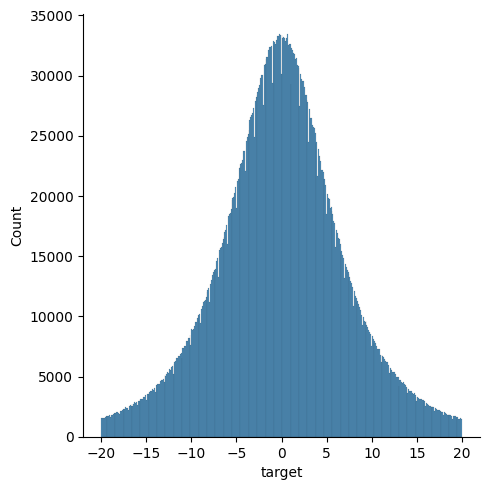

In [233]:
sns.displot(train_df["target"])

In [234]:
def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)
    output_df = df.sort_values(by=["stock_id", "seconds_in_bucket"]).select_dtypes(include=["int64"])
    output_df["target"] = df["target"]
    output_df["book_imbalance"] = df["book_imbalance"]
    for i in range(1, n_steps+1):
        output_df[f'book_imbalance_change_{i}'] = (output_df["book_imbalance"]-output_df["book_imbalance"].shift(i)) / output_df["book_imbalance"].shift(i)
    output_df.dropna(inplace=True)
    output_df = output_df.drop(["time_id", "date_id"], axis=1,)
    for i in range(1, n_steps+1):
        output_df = output_df.query(f'book_imbalance_change_{i}>-20')        #TODO: if the training result is not good, the outlier threshold might be changed
        output_df = output_df.query(f'book_imbalance_change_{i}<20')
    return output_df
    
df = prepare_dataframe_for_lstm(train_df, n_steps=LOOKBACK)
df

,stock_id,seconds_in_bucket,target,book_imbalance,book_imbalance_change_1,book_imbalance_change_2,book_imbalance_change_3,book_imbalance_change_4,book_imbalance_change_5,book_imbalance_change_6
1146,0,60,-0.200272,0.162739,-0.736955,-1.561766,0.698071,-1.366126,-1.641128,-0.784264
1337,0,70,2.410412,0.371575,1.283266,-0.399398,-2.282662,2.877147,-1.835964,-2.463866
1528,0,80,-0.389814,-0.735972,-2.980680,-5.522421,-2.189600,1.540543,-8.679390,0.655777
1719,0,90,-4.339814,-0.268035,-0.635808,-1.721347,-2.647028,-1.433242,-0.074755,-3.796770
1910,0,100,-2.049804,-0.625701,1.334401,-0.149831,-2.683914,-4.844823,-2.011362,1.159892
...,...,...,...,...,...,...,...,...,...,...
5236779,199,259680,4.299879,-0.099488,-0.572394,-7.563143,-2.665993,-1.457703,-1.550173,-1.231749
5236979,199,259690,-2.139807,-0.036526,-0.632858,-0.843008,-3.409605,-1.611656,-1.168042,-1.201992
5237579,199,259720,3.629923,0.073171,-0.772710,-1.132203,-3.003241,-1.735474,-1.314493,3.827020
5237779,199,259730,4.760027,0.142071,0.941636,-0.558685,-1.256690,-4.889565,-2.428022,-1.610632


In [280]:
def scale_stock(df, column_names=[], stock_id=None):
    """
    scale the dataframe with designated stock_id to data ranged between -1 and 1 using yeo-jouhnson and MinMaxScaler
    Yeo-Jouhnson helps to increase the variance of the dataset(because the original dataset has large range but low variance)
    MinMaxScaler then scale down the data between -1 and 1
    input: 
        data_frame: pd.DataFrame
        column_name: list
        stock_id: int64 or a list of int64 in the range of 0~199
    output:
        scaled_data_frame: a new scaled data frame with designated columns
    """
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_data_frame = df

    if stock_id:
        scaled_data_frame = scaled_data_frame.query("stock_id=={}".format(stock_id))

    if len(column_names) == 0:
        var_columns = scaled_data_frame.select_dtypes(include=["float64"]).columns
        
    for column_name in var_columns:
        scaled_data_frame[column_name] = power_transform(scaled_data_frame[[column_name]], method="yeo-johnson") #TODO: use PowerTransformer class so the data can be inversed
        column = scaled_data_frame[column_name].to_list()
        scaled_column = scaler.fit_transform(np.array(column).reshape(-1, 1))
        scaled_data_frame[column_name] = scaled_column

    return scaled_data_frame, scaler
    
scaled_df, scaler = scale_stock(df)

In [251]:
scaled_df

,stock_id,seconds_in_bucket,target,book_imbalance,book_imbalance_change_1,book_imbalance_change_2,book_imbalance_change_3,book_imbalance_change_4,book_imbalance_change_5,book_imbalance_change_6
1146,0,60,-0.009063,0.172534,-0.060965,-0.102761,0.012193,-0.091945,-0.106973,-0.061620
1337,0,70,0.121438,0.380081,0.040899,-0.042568,-0.141392,0.122396,-0.117176,-0.149562
1528,0,80,-0.018541,-0.731678,-0.176268,-0.307069,-0.136546,0.056178,-0.467606,0.012105
1719,0,90,-0.216135,-0.258772,-0.055783,-0.111056,-0.160351,-0.095453,-0.025522,-0.219130
1910,0,100,-0.101567,-0.619894,0.043444,-0.029769,-0.162268,-0.272924,-0.126362,0.037322
...,...,...,...,...,...,...,...,...,...,...
5236779,199,259680,0.215857,-0.089483,-0.052537,-0.410061,-0.161337,-0.096732,-0.102211,-0.084990
5236979,199,259690,-0.106069,-0.026415,-0.055632,-0.065462,-0.199925,-0.104783,-0.082223,-0.083433
5237579,199,259720,0.182380,0.083229,-0.062798,-0.080450,-0.178857,-0.111260,-0.089878,0.169463
5237779,199,259730,0.238848,0.151943,0.023877,-0.050771,-0.087953,-0.275225,-0.148174,-0.104836


In [287]:
"""
For now, it seems like stock_id and time doesn't really affect the Target, 
so it will not be put into training for now. 
"""
scaled_df = scaled_df.sort_values(by="seconds_in_bucket")
scaled_df = scaled_df.drop(["stock_id", "seconds_in_bucket"], axis=1)

In [288]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4073576 entries, 107 to 5237979
Data columns (total 8 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   target                   float64
 1   book_imbalance           float64
 2   book_imbalance_change_1  float64
 3   book_imbalance_change_2  float64
 4   book_imbalance_change_3  float64
 5   book_imbalance_change_4  float64
 6   book_imbalance_change_5  float64
 7   book_imbalance_change_6  float64
dtypes: float64(8)
memory usage: 279.7 MB


<Axes: title={'center': 'Stock 20 Date 1'}, xlabel='seconds_in_bucket'>

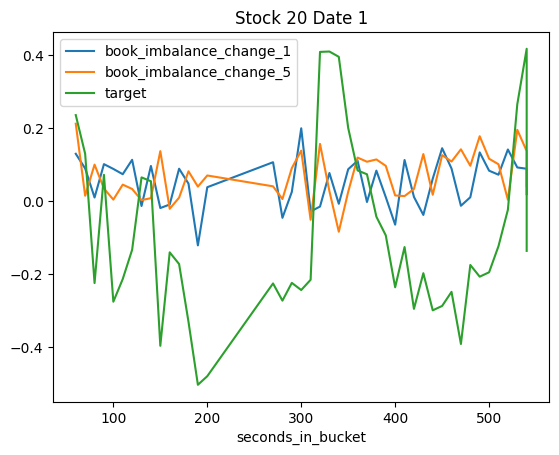

In [239]:
stock_id = 20
(
    df
    .query("stock_id=={} & seconds_in_bucket > 10 & seconds_in_bucket < 550".format(stock_id))
    [['seconds_in_bucket',"book_imbalance_change_1", 'book_imbalance_change_5', "target"]]
    .replace(0, np.nan)
    .set_index('seconds_in_bucket')
    .plot(title='Scaled Stock {} Date {}'.format(stock_id, date_id))
)

## Train Data Preperation

In [254]:
scaled_df_np = scaled_df.to_numpy()

In [255]:
X = scaled_df_np[:, 1:]
y = scaled_df_np[:, 0]

X.shape, y.shape

((4073576, 7), (4073576,))

In [256]:
# reverse the order of columns for better approximation result
X = dc(np.flip(X, axis=1))
X

array([[-0.09272027, -0.10885502, -0.09795796, ..., -0.12834287,
         0.02455289,  0.15838328],
       [-0.00239842, -0.13991389, -0.12532574, ..., -0.13507117,
         0.52584709,  0.96880884],
       [-0.154524  , -0.09003922, -0.08849882, ..., -0.27131433,
        -0.09596549,  0.24486227],
       ...,
       [-0.04469984, -0.04346226, -0.10418293, ..., -0.11535086,
        -0.03376625, -0.51307309],
       [-0.09463515, -0.22341759, -0.15183189, ..., -0.10231938,
         0.00822897,  0.32277582],
       [-0.02543749,  0.05322661, -0.06426885, ..., -0.13822365,
        -0.10740553, -0.08100004]])

In [257]:
split_index = int(len(X) * 0.85)

split_index

3462539

In [258]:
# split train and test
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3462539, 7), (611037, 7), (3462539,), (611037,))

In [262]:
# reshape the array for PyTorch training
X_train = X_train.reshape((-1, LOOKBACK+1, 1))
X_test = X_test.reshape((-1, LOOKBACK+1, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3462539, 7, 1), (611037, 7, 1), (3462539, 1), (611037, 1))

In [265]:
# transform into torch tensor
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([3462539, 7, 1]),
 torch.Size([611037, 7, 1]),
 torch.Size([3462539, 1]),
 torch.Size([611037, 1]))

In [269]:
#generate dataset
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [270]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [271]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [266]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [267]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [272]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [273]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [274]:
for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.130
Batch 200, Loss: 0.127
Batch 300, Loss: 0.126
Batch 400, Loss: 0.128
Batch 500, Loss: 0.113
Batch 600, Loss: 0.128
Batch 700, Loss: 0.122
Batch 800, Loss: 0.118
Batch 900, Loss: 0.123
Batch 1000, Loss: 0.127
Batch 1100, Loss: 0.118
Batch 1200, Loss: 0.128
Batch 1300, Loss: 0.125
Batch 1400, Loss: 0.123
Batch 1500, Loss: 0.124
Batch 1600, Loss: 0.123
Batch 1700, Loss: 0.118
Batch 1800, Loss: 0.123
Batch 1900, Loss: 0.121
Batch 2000, Loss: 0.120
Batch 2100, Loss: 0.124
Batch 2200, Loss: 0.118
Batch 2300, Loss: 0.124
Batch 2400, Loss: 0.117
Batch 2500, Loss: 0.119
Batch 2600, Loss: 0.125
Batch 2700, Loss: 0.120
Batch 2800, Loss: 0.129
Batch 2900, Loss: 0.125
Batch 3000, Loss: 0.128
Batch 3100, Loss: 0.126
Batch 3200, Loss: 0.122
Batch 3300, Loss: 0.113
Batch 3400, Loss: 0.121
Batch 3500, Loss: 0.123
Batch 3600, Loss: 0.123
Batch 3700, Loss: 0.125
Batch 3800, Loss: 0.129
Batch 3900, Loss: 0.123
Batch 4000, Loss: 0.124
Batch 4100, Loss: 0.118
Batch 4200, Loss

In [282]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()
    
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], LOOKBACK+2))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([-0.12991392, -0.76558333, -0.18499511, ...,  0.09786669,
       -0.09976488, -0.07044733])

In [283]:
dummies = np.zeros((X_train.shape[0], LOOKBACK+2))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([-2.40385654, -3.53287791, -2.79649456, ...,  0.43180735,
       -2.42355607,  0.45167714])

In [277]:
test_df = pd.read_csv(TEST_FILE_PATH)